In [49]:
from pathlib import Path
import librosa
import pandas as pd
import numpy as np

def read_metadata(data_folder: Path, instrument_filter: str=None, filename: str="examples.json") -> pd.DataFrame:
    """
    Read an NSynth metadatafile from disk as pandas DataFrame.

    :param data_folder: root folder of dataset, for example `Path('./data/nsynth-test')`
    :param instrument_filter: exact name of instrument_str, Falsy reads all
    :param filename: default = "examples.json"
    :return: pandas DataFrame with sound-id as index
    """
    if type(data_folder) is str:
        data_folder = Path(data_folder)

    metadata_file = data_folder / filename
    metadata = pd \
        .read_json(metadata_file, orient='index')
    

    if instrument_filter:
        metadata = metadata.query('instrument_str == @INSTRUMENT')

    return metadata

def read_stft_data(data_folder: Path,  instrument_filter: str=None, filename: str="dataset_stft_test.csv") -> pd.DataFrame:
    if type(data_folder) is str:
        data_folder = Path(data_folder)
        
    metadata_file = data_folder / filename
    metadata = pd.read_csv(metadata_file)
    return metadata

def create_moving_spectrum_dataset(data_folder: Path, n_fft=2048, metadata_columns: [str] = None) -> pd.DataFrame:
    
    if type(data_folder) is str:
        data_folder = Path(data_folder)

#     metadata = read_metadata(data_folder)
    
    #return metadata.name

    #def _get_row_spectrum(row):
    wave_file = (data_folder / 'audio' / 'string_acoustic_056-058-127.wav')

    y, sr = librosa.load(wave_file, sr=22050)

    S = np.abs(librosa.stft(y, n_fft=n_fft))
    
    print(S.shape)

    return S
    
    
create_moving_spectrum_dataset('../data/nsynth-test')
md = read_stft_data("../data/generated/")
md

(1025, 173)


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,177315,177316,177317,177318,177319,177320,177321,177322,177323,177324
0,bass_synthetic_068-049-025,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,keyboard_electronic_001-021-127,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,guitar_acoustic_010-066-100,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,reed_acoustic_037-068-127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,flute_acoustic_002-077-100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,string_acoustic_056-047-075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,vocal_synthetic_003-088-025,34.0,48.0,75.0,102.0,126.0,149.0,172.0,190.0,204.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,brass_acoustic_046-101-050,7.0,0.0,9.0,7.0,4.0,5.0,4.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,guitar_acoustic_014-070-050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,string_acoustic_014-063-050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


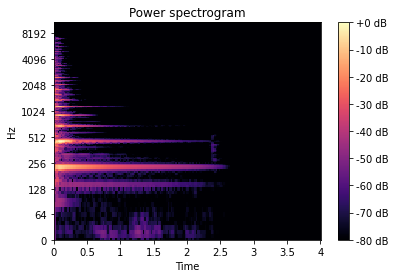

In [31]:
import matplotlib.pyplot as plt
import librosa.display

fig, ax = plt.subplots()

img = librosa.display.specshow(librosa.amplitude_to_db(md,

                                                       ref=np.max),

                               y_axis='log', x_axis='time', ax=ax)

ax.set_title('Power spectrogram')

fig.colorbar(img, ax=ax, format="%+2.0f dB")

(1025, 173)